# World Climate & Population Data

**Author: Roudayna ElChammaa**

For this project, I'm looking at various contributing factors of climate change.
I'm particularly interested in economies which generate significant oil revenue because as attitudes towards economic practices shift with climate data, it is worth looking at what these nations' consumption trends are over time, and what this may mean with respect to a sectoral shift to renewable resource-based industries.

Of course, there are many other things to consider, such as lifestyle and population dynamics, urbanization, and carbon/other GHG emmissions.
* The first aspect I look at is **population growth**.
> I start off looking at Norway, Denmark, and Sweden, and look at the 2011 rates of urban expansion relative to the overall population growth rate in that year.
> I then take a more general look at population growth rates in the European continent.

* Next, I compare the **CO2 emissions rates** of Sweden, Norway and Denmark to particularly "low-scorers" on the population growth front. Using the data, I evaluate the correlation between the top 20 emitters, and take a look at "low-scorers" on the CO2 front as well. 



* I then move over to the MENA region, and compare the population and emission statistics to the aforementioned ones of the European nations.

My goal is to use Pandas, Matplotlib and Plotly to organize data, create interesting graphics and highlight "stand-out" statistics that tell a story on climate change and the factors at play in different parts of the world.

### Setting up...

In [367]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # fancy matplotlib graphics (no styling)
from pandas.io import data, wb         # worldbank data

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode()

The code below draws in longitude and latitude coordinates which are essential for mapping, as will be seen below.

In [316]:
# read a list of latitude and longitude coordinates for
# country capitals
lat_lon = pd.read_html("http://www.csgnetwork.com/llinfotable.html", header=0, 
                       attrs={"align": "center", "cellpadding": 5, "bgcolor": "#FFFFFF"})[0]

# clean up so lat and long are numeric in degrees east and degrees north
def clean_latlon(series, to_negate):
    # get XX.YY data
    split1 = series.str.split("°")
    split2 = split1.str.get(1).str.split("'")
    data = split1.str.get(0) + "." + split1.str.get(0)
    
    # now add a negative side if last character == to_negate
    signs = split2.str.get(1) == to_negate
    signs = signs.replace({True: "-", False: ""})
    
    data = signs.str[:] + data.str[:]
    return data.astype(float)
    
lat_lon["Latitude"] = clean_latlon(lat_lon["Latitude"], "S")
lat_lon["Longitude"] = clean_latlon(lat_lon["Longitude"], "W")
lat_lon = lat_lon.drop("Capital", axis=1)
lat_lon = lat_lon.set_index("Country")
lat_lon.head()

,Latitude,Longitude
Country,,
Afghanistan,34.34,69.69
Albania,41.41,19.19
Algeria,36.36,3.03
American Samoa,-14.14,-170.17
Andorra,42.42,1.01


Next, we create a dataframe displaying ISO codes for each country.

In [317]:
url = "http://unstats.un.org/unsd/methods/m49/m49alpha.htm"
iso = pd.read_html(url, attrs={"border": "0", "cellpadding": "2"}, header=0)[0]
iso = iso.rename(columns={"ISO ALPHA-3 code": "ISO", 
                          "Country or area name": "Country"})
iso = iso.drop("Numerical  code", axis=1)
iso = iso.set_index("Country")
iso.head()

,ISO
Country,
Afghanistan,AFG
Åland Islands,ALA
Albania,ALB
Algeria,DZA
American Samoa,ASM


Now we are ready to begin...


## Scandinavia and the Broader European Continent

### Introduction

First we look at population growth and urbanization in Sweden, Denmark and Norway.

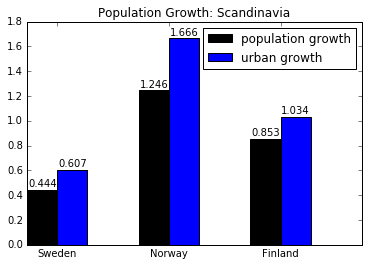

In [368]:
import numpy as np
import matplotlib.pyplot as plt
N = 3
ind = np.arange(N)  
width = 0.27       
fig = plt.figure()
ax = fig.add_subplot(111)
# population growth bar
yvals = [0.444197155, 1.24566618,0.852524629]

# fill up this list with the population growth for each country

rects1 = ax.bar(ind, yvals, width, color='k')

# urban growth bar

zvals = [0.606766049, 1.665525057, 1.033750395]

# fill up this list with the urban growth for each country

rects2 = ax.bar(ind+width, zvals, width, color='b')

ax.set_xticks(ind+width)
ax.set_xticklabels( ('Sweden', 'Norway', 'Finland') )
ax.legend( (rects1[0], rects2[0]), ('population growth', 'urban growth') )
ax.set_title('Population Growth: Scandinavia')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., .01+h, '%.3f'%(h),
                ha='center', va='bottom')

autolabel(rects2)
autolabel(rects1)
plt.show()

The figures in the above chart were created, drawing from the [World Bank](http://data.worldbank.org) databases. The indicator we are looking at here, is _SP.POP.GROW_ vs. *SP.URB.GROW*. Environmental scientists assert that economic inefficiencies, inequality and unsustainable practices culminate in a greater level of urbanization, which dillute our pool of resources at *increasingly* unsustainable levels, and also lead to higher pollution levels.

This was the starting point of my interests in this area:
> Whst is the relationship between urbanization and population growth?

As seen in the chart above, Sweden, Denmark and Norway are seeing larger urban growth rates than population growth rates, indicating that people are *crowding in* to the city. The data is for 2011 but nevertheless raises concerns about the ability of the environment and economy to sustain itself, while catering to an increasingly large number of people.

For more, a video on the correlation between urbanization and climate change: 

[![ZurichNorthSmerica](http://localhost:8888/files/Screen%20Shot%202016-05-13%20at%208.24.15%20PM.png)](https://www.youtube.com/watch?v=eN1ivTKTcKY"Climate Change & Urbanization: The Perfect Storm")

To get a more general view of what these statistics mean, let us take a look at the population growth rates in the broader European continent. First we create a list of all the European countries and draw in World Bank data on population growth rates for those countries, which we put into a dataframe.

In [333]:

europe = ["Albania",  "Andorra",  "Armenia",  "Austria",  "Azerbaijan",  "Belarus",
          "Belgium",  "Bosnia and Herzegovina",  "Bulgaria",  "Croatia",  "Cyprus",
          "Czech Republic",  "Denmark",  "Estonia",  "Finland",  "France",  "Georgia",
          "Germany",  "Greece",  "Hungary",  "Iceland",  "Ireland",  "Italy",
          "Kazakhstan",  "Kosovo",  "Latvia",  "Liechtenstein",  "Lithuania",
          "Luxembourg",  "Macedonia",  "Malta",  "Moldova",  "Monaco",  "Montenegro",
          "Netherlands",  "Norway",  "Poland",  "Portugal",  "Romania",  "Russia",  
          "San Marino",  "Serbia",  "Slovakia",  "Slovenia",  "Spain",  "Sweden",
          "Switzerland",  "Turkey",  "Ukraine",  "United Kingdom",  "Vatican City"]


iso_europe = iso[iso.index.isin(europe)]
popg = wb.download(country=iso_europe["ISO"], indicator="SP.POP.GROW", start=2011, end=2011)
popg = popg.reset_index(level="year", drop=True)
popg.index.name = "Country"

popg = popg.dropna()
popg.columns = ["Population growth"]
popg.head()

,Population growth
Country,
Andorra,-2.510552
Albania,-0.283303
Armenia,0.151328
Austria,0.337081
Azerbaijan,1.303001


In [320]:
popg = popg.merge(iso, left_index=True, right_index=True)
popg = popg.merge(lat_lon, left_index=True, right_index=True)
popg.head()

,Population growth,ISO,Latitude,Longitude
Country,,,,
Albania,-0.283303,ALB,41.41,19.19
Andorra,-2.510552,AND,42.42,1.01
Armenia,0.151328,ARM,40.40,44.44
Austria,0.337081,AUT,48.48,16.16
Azerbaijan,1.303001,AZE,40.40,49.49


As in class, I read in the ISO codes and a data set from *The World Bank* using `wb.download`. I merged these into a single dataframe and will use the data for all European countries to create a map depicting growth rates in 2011.

Below, is the code for the map, whose color hue/intensity depends on the rate of population growth in 2011, for the European countries within the `europe` list above (i.e. the entirety of Europe).

In [321]:
trace = dict(type="choropleth",
             locations=popg["ISO"],   
             z=popg["Population growth"], 
             colorscale="RdPu",    
             text=popg.index,
             )


iplot(go.Figure(data=[trace], layout=layout), link_text="")

Hovering over the graphs gives us the country names and population growth stats for each nation. As we can see, Sweden, Norway and Denmark fall on the higher end of the spectrum with rates of 0.755, 1.297, and 0.412 repectively. These rates are still quite low, especially in comparison to the GCC nations, which we will look at later. However, their neighbors experience much lower rates in relative term, with countries such as Latvia and Lithuania experiencing a decline in the growth rate for te 2011 year. (Latvia had a rate of -1.821, Lithuania - even lower, at -2.258).

## Carbon Dioxide Emissions (in kilotons)

In [351]:
co2 = wb.download(country=iso_europe["ISO"], indicator=["EN.ATM.CO2E.KT"],
                   start=2011, end=2011)
co2

,,EN.ATM.CO2E.KT
country,year,
Andorra,2011,491.378
Albania,2011,4668.091
Armenia,2011,4961.451
Austria,2011,65202.927
Azerbaijan,2011,33457.708
Belgium,2011,97765.887
Bulgaria,2011,49339.485
Bosnia and Herzegovina,2011,23747.492
Belarus,2011,63303.421


In [353]:
co2=co2.reset_index(level="year", drop=True).reset_index("country").dropna().sort_values("EN.ATM.CO2E.KT")
co2

,index,country,EN.ATM.CO2E.KT
0,0,Liechtenstein,51.338
1,1,Andorra,491.378
2,2,Iceland,1881.171
3,3,Malta,2511.895
4,4,Montenegro,2570.567
5,5,Albania,4668.091
6,6,Armenia,4961.451
7,7,Cyprus,7521.017
8,8,Latvia,7799.709
9,9,Georgia,7931.721


That doesn't look great so I'm going to eliminate the index column. I left in the counter because it makes clearer the ranking of emissions across countries.

In [354]:
del co2["index"]

In [355]:
co2

,country,EN.ATM.CO2E.KT
0,Liechtenstein,51.338
1,Andorra,491.378
2,Iceland,1881.171
3,Malta,2511.895
4,Montenegro,2570.567
5,Albania,4668.091
6,Armenia,4961.451
7,Cyprus,7521.017
8,Latvia,7799.709
9,Georgia,7931.721


I was interested in looking at where Lithuania ranked relative to other European countries because of the low population growth rate in 2011. I wondered if it meant that Lithuania was the lowest emitter since, on average, there *might* be lower consumption per capita (a very basic assumption... is it accurate?)

Now we can get rid of the counter.

In [252]:
co2.set_index("country")

,EN.ATM.CO2E.KT
country,
Liechtenstein,51.338
Andorra,491.378
Iceland,1881.171
Malta,2511.895
Montenegro,2570.567
Albania,4668.091
Armenia,4961.451
Cyprus,7521.017
Latvia,7799.709


Above, is a sorted dataframe, ordered from lowest to highest CO$_2$ emissions. Lithuania, being a small country and displaying negative population growth in 2011, is well-down the list in relative terms. It ranked 11, emitting 13740.249 kilotons - probably not the rank/statistic we were assuming, after looking at its population data. This implies that the correlation between population growth and greenhouse gas emissions might not be as absolutely strong as one may be inclined to think. We will test this using the top 16 lowest emission countries, in which Sweden, Denmark, and Norway are included.

First, I create a *text (`csv`) file* containing only the data that I am concerned with, that is cO$_2$ emissions and population growth rate in 2011. I read this file in.

Within a `for loop`, I split the data at every *','* to prepare every data point for plotting.

I indicate that the country names are those in the first line (*position 0*), and then give the positions of emission and population data, converting these values into *floating point numbers*.

NOTE that: `countries` is a list of three lists and within our for loop, we say that `countries[0]`. the first element in our list of empty lists, `countries`, takes on the items that are appended to the *`name`* list as we iterate through. We iterate through the data and add population growth data to the *`popGrowth`* list, which is assigned to the second empty spot in `countries`. And finally, as we fill up the *`co2`* list while iterating  through, this list is assigned to `countries[2]`, which is the third and final empty spot in the `countries` list.


In [340]:
file = open('pop_data.csv','r')

In [341]:
file = open('pop_data.csv','r')
lines = file.readlines()
countries = [[],[],[]]
for line in lines:
    line = line.split(",")
    print(line)
    name = line[0]
    popGrowth = float(line[1])
    co2 = float(line[2])
    countries[0].append(name)
    countries[1].append(popGrowth)
    countries[2].append(co2)


['Andorra', '-2.510551958', '491.378\n']
['Denmark', '0.411737855', '40377.337\n']
['Estonia', '-0.303582823643979', '18650.362\n']
['Slovenia', '0.207732702', '15405.067\n']
['Montenegro', '0.105041772', '2570.567\n']
['Norway', '1.297189391', '45533.139\n']
['Iceland', '0.305468368', '1881.171\n']
['Sweden', '0.755150134', '52144.74\n']
['Liechtenstein', '0.716908019', '51.338\n']
['Georgia', '-1.307543305', '7931.721\n']
['Armenia', '0.151328197', '4961.451\n']
['Cyprus', '1.16731774', '7521.017\n']
['Lithuania', '-2.258463899', '13740.249\n']
['Malta', '0.423700885', '2511.895\n']
['Luxembourg', '2.222660503', '10832.318\n']
['Albania', '-0.283303108', '4668.091']


Now that all the data organization is complete, we are ready to plot. I've chosen to use `scatter` to display any correlation (or lack thereof) between population growth and statistics, which might help me better understand how Lithuania has such low population growth rates and yet (relatively) higher CO2 levels.

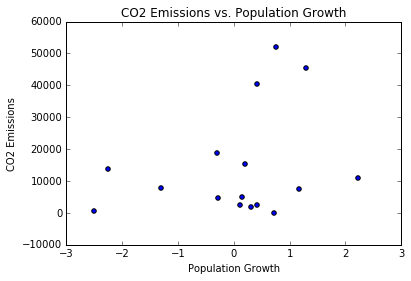

In [342]:
plt.scatter(countries[1][:],countries[2][:])
plt.title("CO2 Emissions vs. Population Growth")
plt.xlabel('Population Growth')
plt.ylabel('CO2 Emissions')
plt.show()

The limitation of the above chart is that it is plotted for 2011 data only. However, I hope to give a general, and very basic sense of what low (or negative) population growth rates imply with regards to greenhouse gas emissions. Each point represents a country. In general, we see that the lower rates of population growth *do* correspond to lower CO$_2$ emissions, and the higher rates - to high emissions, but of course, we know that this is not the be-all and end-all.

## The Gulf Cooperation Council

Next, we consider the GCC countries (Bahrain, Kuwait, Oman, Qatar, Saudi Arabia, and the UAE).
As above, I create a dataframe, drawing on World Bank data re: population growth rates in 2011.

In [332]:
gcc = ["Kuwait", "Saudi Arabia", "Qatar", "Oman", "Bahrain", "United Arab Emirates"]


iso_gcc = iso[iso.index.isin(gcc)]
popg_gcc = wb.download(country=iso_gcc["ISO"], indicator="SP.POP.GROW", start=2011, end=2011)
popg_gcc = popg_gcc.reset_index(level="year", drop=True)
popg_gcc.index.name = "Country"

popg_gcc = popg_gcc.dropna()
popg_gcc.columns = ["Population growth"]
popg_gcc

,Population growth
Country,
United Arab Emirates,4.750833
Bahrain,3.482175
Kuwait,5.707784
Oman,8.658861
Qatar,7.627008
Saudi Arabia,2.453717


Then, we will be looking at carbon dioxide emissions in these countries.

In [363]:
co2_gcc=wb.download(country=iso_gcc["ISO"], indicator=["EN.ATM.CO2E.KT"],
                   start=2011, end=2011)
co2_gcc.sort_values("EN.ATM.CO2E.KT")

,,EN.ATM.CO2E.KT
country,year,
Bahrain,2011,23439.464
Oman,2011,64854.562
Qatar,2011,83875.291
Kuwait,2011,91029.608
United Arab Emirates,2011,178483.891
Saudi Arabia,2011,520277.627


I'm looking at the GCC countries because they are major oil producers and exporters. I wondered what their carbon emissions were relative to the European nations discussed above. 

Evidently, there is a massive difference between the lowest emission level in the GCC and the lowest in Europe (approximately 23439 kt (kilotons) compared to about 53 kt. The lowest GCC carbon generator is Bahrain, and they fall in between the 14th and 15th positioning of European emitters (between Croatia and Bosnia and Herzegovina). 

While this is a very complex subject with many factors determining these growth and emission statistics, can we simply attribute these high emission levels in the GCC to more rapidly expanding populations? Could it be  because they are some of the world's principal oil exporters?

What about the Scandinavian countries, Sweden and Norway? They, too, export oil, but their rates are much lower. 

>Why?
>>Has it always been this way?
>>> What could be causing the changes in oil dependency in these nations?

Let's look at some examples: *Kuwait*, _Saudi Arabia_, _the UAE_, *Sweden*, and _Finland_ *Norway*, although a powerful oil-exporter, had boring data - the values were very low to start with, and became increasingly lower (The reasons *why* this is the case, may be interesting to consider, however).

...So I got rid of Norway and introduced a new player - Finland - instead.

Below, is a timeseries of oil production as a percentage of total electricity generation in the aforementioned countries.

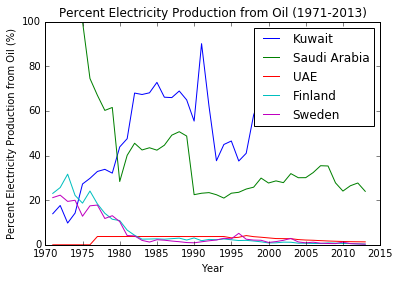

In [366]:
import matplotlib.pyplot as plt
kuwait = [13.91536409,17.61658031,9.750753218,14.20858896,27.24919094,29.77614821,
32.86048064,33.81068309,32.11467038,43.85459382,47.53869196,67.98016925,67.34138731,
68.09414136,72.77031848,66.12341305,65.9518019,68.90147457,64.90870287,55.43107647,
90.12059369,62.08469055,37.66478343,44.94342602,46.50143315,37.54268891,41.00059871,
58.16768943,67.66848239,67.60607,69.29064987,78.1001045,75.38063414,72.30221059,
74.9073947,68.59075346,68.1045269,64.3297455,71.16092904,65.37025022,61.98200393,
63.77783098,63.16290053]

#kuwait oil production 1971-2013

saudi_arabia = [100,100,100,100,100,74.51247166,66.98076168,60.21230215,61.52765905,
                28.34930569,40.08534323,45.49404473,42.48934356,43.47500562,42.40030692,
                44.61654703,49.12268188,50.66900494,48.72031927,22.46127615,23.10062018,
                23.38240662,22.42970123,20.93013352,23.11285081,23.52592124,24.98186822,
                25.81680814,29.89287065,27.68343226,28.63555093,27.84613648,31.89411765,
                30.05660672,30.08107924,32.35501615,35.43181043,35.3129285,27.75725302,
                24.07078024,26.45305246,27.69029741,23.9510311]

united_arab_emirates = [0,0,0,0,0,0,3.72250423,3.719447396,3.70667201,3.710751665,3.727827051,3.712843522,
                        3.717582092,3.718181818,3.708333333,3.722491025,3.712381929,3.71967655,3.702280297,
                        3.706088993,3.70583828,3.702712826,3.709157846,3.707448601,3.10623649,3.368207135,
                        4.133802817,3.650574988,3.388460917,3.089325055,2.798109886,2.763786922,2.744186047,
                        2.335120285,2.135160961,2.032410736,1.863190813,1.705309529,1.588773696,1.478593648,
                        1.400082714,1.357699805,1.311404417]

finland = [23.0339929,25.65543875,31.64508467,22.12732076,18.6695197,24.08819005,18.31832739,
           14.11060114,11.4542721,10.84251601,6.568236818,4.262295082,2.528615778,2.587939144,
           2.675195108,2.506799821,2.747088124,2.9975129,2.131296802,3.087702521,1.843548443,
           2.409701169,2.29538794,2.606999741,2.259701726,1.905640523,1.992020354,1.700229453,
           1.336078437,0.838954951,0.891478592,1.191540463,1.14930259,0.716524333,0.708496287,
           0.584440043,0.577252083,0.843287919,0.742416253,0.599997521,0.566132742,0.443188113,
           0.328416443]

sweden = [21.1455797,22.23633344,19.44273636,19.95340168,12.80539279,17.46226502,17.80217582,
          11.78566815,13.03305072,10.37833797,4.152810999,3.979419567,1.978524649,1.228218191,
          2.279202279,2.06106428,1.679716668,1.385598835,1.011083434,0.891193555,1.354017827,
          1.798733691,2.143934126,2.894183602,2.66297128,5.134860304,2.501239897,2.119767493,
          2.028571798,1.055559763,1.429499675,2.014314928,2.859379963,1.288297851,0.870773214,
          1.164803261,0.723678464,0.582411571,0.534391379,1.194934663,0.526441892,0.389338845,
          0.268573034]



#saudi arabia oil production 1971-2013

years = [year for year in range(1971,2014)]

plt.plot(years,kuwait,label = "Kuwait")
plt.plot(years,saudi_arabia,label = "Saudi Arabia")
plt.plot(years,united_arab_emirates,label = "UAE")
plt.plot(years,finland,label = "Finland")
plt.plot(years,sweden,label = "Sweden")
plt.xlabel("Year")
plt.ylabel("Percent Electricity Production from Oil (%)")
plt.title("Percent Electricity Production from Oil (1971-2013)")
plt.legend()
plt.show()

In the above code, I drew on World Bank Data to create lists of oil production as a % of total electricity generation, from 1971-1973. I did this for Kuwait, Saudi Arabia and the UAE (some of the largest GCC exporters), as well as Finland and Sweden. There are several interesting things to note:

1. The UAE, while a large oil exporter, evidently does not depend as much on oil. Somewhat strangely, (possibly an error in data records?) its low values have been consistent **since** the 1970s, whereas *Kuwait*, for instance had, for a while, been demonstrating an upwards trend in oil production. Only recently has this trend plateaued.

2. Evidently, the Kuwaiti economy is not operating in a sustainable pace - or fashion, generally. It tapers off towards 2013, but in terms of decreasing dependency on oil, Kuwait still lags behind its GCC counterparts, the UAE and Saudi Arabia. This, no doubt contributed to the record deficit, which is expected to ["jump by 50% in the 2016-17 year"](http://www.arabianbusiness.com/kuwait-sees-budget-deficit-jumping-by-50-in-2016-17-620146.html).

3. Saudi Arabia's oil production has evidently tapered off as well. And while they continue to be a very large exporter of oil, we are seeing a shift in the Saudi economy towards renewable energy. According to [*"Arabian Business"*](http://www.arabianbusiness.com/kuwait-sees-budget-deficit-jumping-by-50-in-2016-17-620146.html), the KSA is going solar.

4. Sweden and Finland started off higher than the UAE though quickly reduced their oil production and converged wit the reported UAE level. This may also be why Norway's data values are miniscule (and increasingly so as we move closer to 2013); perhaps they have never been heavily reliant on oil production, and are even less so today, due to a thriving renewable energy industry.

### Conclusion

Climate change is an enormously complex issue that ties into cultural habits, economics, and a whole host of other areas.
>Instead of focusing just on temperature levels, I found myself drawn more to the previously mentioned contributors to the environmental conditions we find ourselves in today. This notebook obviously does not begin to scratch the surface of climate change data, its effects and the projections of environmental scientists as well as what all of it means in economic, social, and cultural terms.

However, the above graphs have allowed me to convey several interesting and key points about consumption patterns in different parts of the world, population dynamics and the environmental connection.

We found that:

* Across different countries, we find that in a particular year (2011, in this case), it appears that, on average, the higher the population, the higher the CO2 emissions. This is not a solid rule, because Lithuania, for instance, showed higher values than what one would expect for a population growth as low as that which it displayed in 2011. It would be interesting to look at this over time, and perhaps for other greenhouse gases as well.


* Population growth and carbon emission is much lower in Europe than the GCC region, where member nations generally depend more highly on fossil fuels. The UAE data is strikingly low - almost too low, especially to start with, which makes me feel as though the data is flawed. In any case, the data lines up well with what we are seeing in the data and hearing in the news about GCC countries overall: Kuwait's debt levels are alarming and unsustainable, and we are seeing a greater general push for renewable (solar) energy, especially in the UAE and Saudi Arabia.


* While also significant exporters, the Scandinavian countries rely much less heavily on oil than the GCC countries overall. In fact, Norway, known for being a relatively oil-rich country, displayed data so low that it really would not have conveyed anything to the viewer if it were left in for plotting. What this *does* tell us though, is that they have found alternatives, and adjusted their consumption patterns to cater to the needs of the environment and a healthy economy. 
>For more on the state of renewable energy production, housing and architecture, in Scandinavia, go ["here"](http://inhabitat.com/denmark-now-25-percent-powered-by-offshore-wind-aims-to-double-capacity-by-2020/).